In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('train.csv')
df

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [3]:
df.isnull().sum()

sms      0
label    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


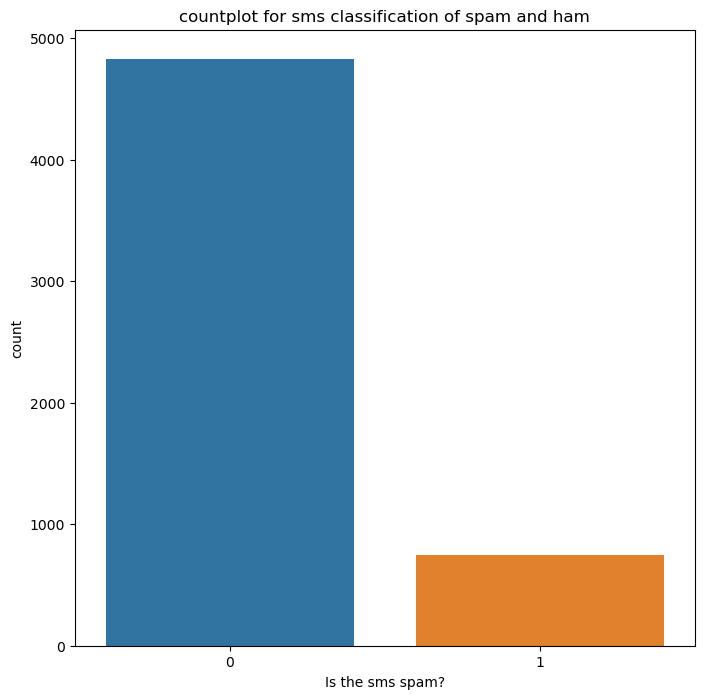

In [5]:
plt.figure(figsize=(8,8))
p = sns.countplot(x = 'label',data = df)
p = plt.title('countplot for sms classification of spam and ham')
p = plt.xlabel('Is the sms spam?')
p = plt.ylabel('count')

In [6]:
df['label'].value_counts()

0    4827
1     747
Name: label, dtype: int64

In [7]:
#There is a class imbalance and hence it needs to handled.

In [8]:
only_spam = df[df['label'] == 1]
only_spam

,sms,label
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1
11,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5549,Had your contract mobile 11 Mnths? Latest Moto...,1
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [9]:
#so only 747 of sms are spam.

In [10]:
count = int((df.shape[0]-only_spam.shape[0]) / only_spam.shape[0])
count

6

In [11]:
for i in range(0,count-1):
    df = pd.concat((df,only_spam),axis=0) #basically we added duplicate data for only spam msgs.
df['label'].value_counts()

0    4827
1    4482
Name: label, dtype: int64

In [12]:
df.reset_index()

,index,sms,label
0,0,"Go until jurong point, crazy.. Available only ...",0
1,1,Ok lar... Joking wif u oni...\n,0
2,2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,3,U dun say so early hor... U c already then say...,0
4,4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
9304,5539,Want explicit SEX in 30 secs? Ring 02073162414...,1
9305,5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
9306,5549,Had your contract mobile 11 Mnths? Latest Moto...,1
9307,5568,REMINDER FROM O2: To get 2.50 pounds free call...,1


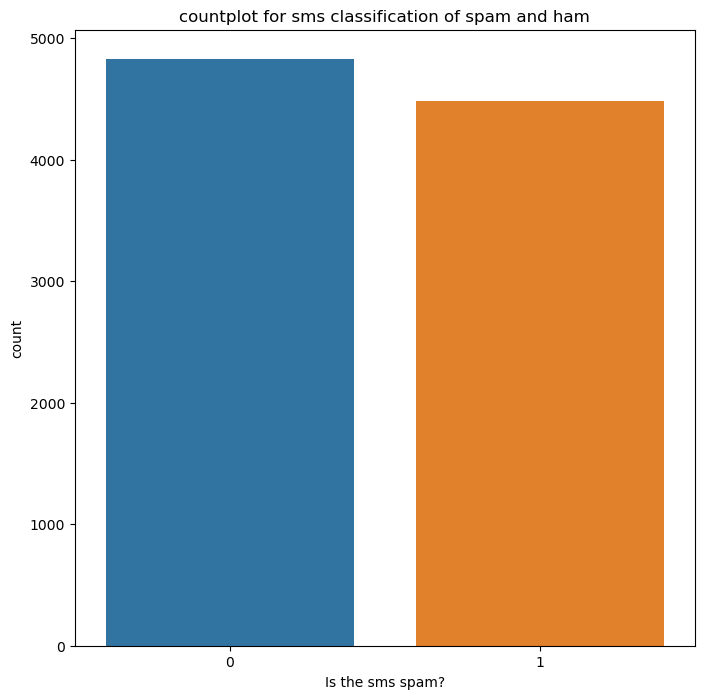

In [14]:
plt.figure(figsize=(8,8))
p = sns.countplot(x = 'label',data = df)
p = plt.title('countplot for sms classification of spam and ham')
p = plt.xlabel('Is the sms spam?')
p = plt.ylabel('count')

In [17]:
df['word_count'] = df['sms'].apply(lambda x: len(x.split()))

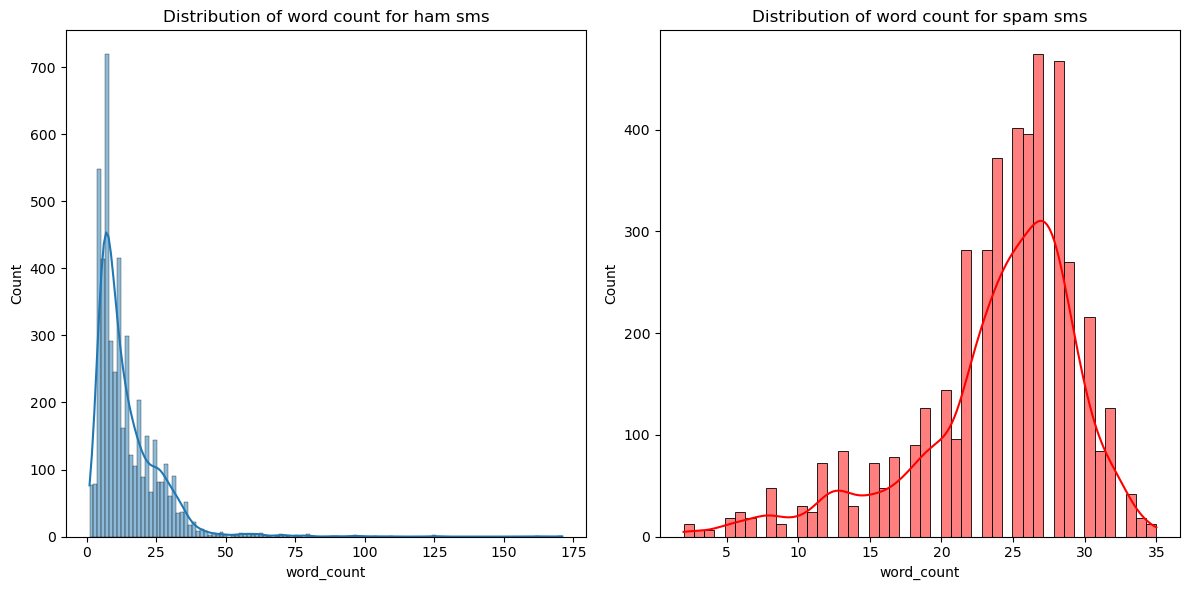

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g = sns.histplot(data=df[df['label'] == 0].word_count,kde=True)
p = plt.title('Distribution of word count for ham sms')

plt.subplot(1,2,2)
g = sns.histplot(data=df[df['label'] == 1].word_count,kde=True,color='red')
p = plt.title('Distribution of word count for spam sms')

plt.tight_layout() #adjusts the padding between and around subplots.
plt.show()

In [20]:
def currency(data):
    currency_symbols = ['$','€','¥','£','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0
    

In [21]:
df['contains_currency_symbols']  = df['sms'].apply(currency)
df

,sms,label,word_count,contains_currency_symbols
0,"Go until jurong point, crazy.. Available only ...",0,20,0
1,Ok lar... Joking wif u oni...\n,0,6,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,0
3,U dun say so early hor... U c already then say...,0,11,0
4,"Nah I don't think he goes to usf, he lives aro...",0,13,0
...,...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,16,0
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,33,1
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,28,0
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,28,0


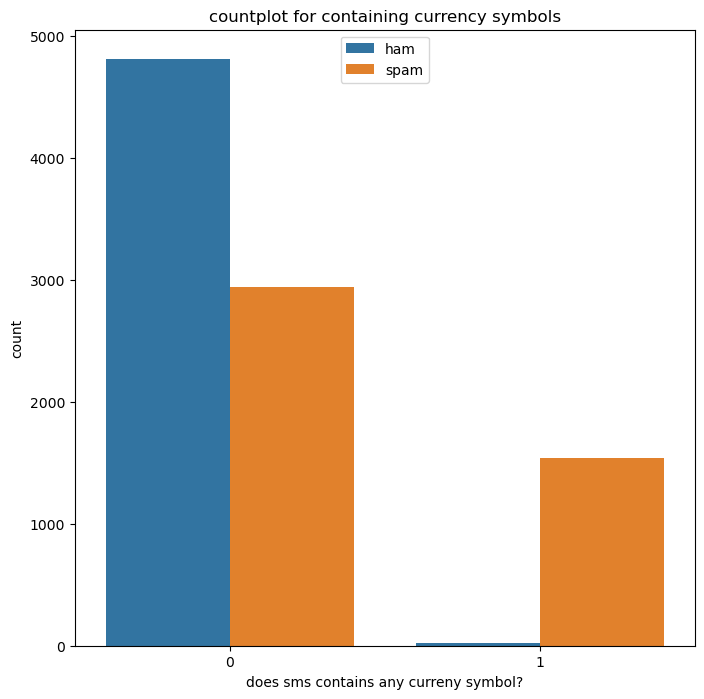

In [25]:
plt.figure(figsize=(8,8))
p = sns.countplot(x = 'contains_currency_symbols', data = df, hue= 'label')
p = plt.title('countplot for containing currency symbols')
p = plt.xlabel('does sms contains any curreny symbol?')
p = plt.ylabel('count')
p = plt.legend(labels = ['ham','spam'], loc =9)

In [26]:
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [27]:
df['contains_number'] = df['sms'].apply(number)

In [28]:
df

,sms,label,word_count,contains_currency_symbols,contains_number
0,"Go until jurong point, crazy.. Available only ...",0,20,0,0
1,Ok lar... Joking wif u oni...\n,0,6,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,0,1
3,U dun say so early hor... U c already then say...,0,11,0,0
4,"Nah I don't think he goes to usf, he lives aro...",0,13,0,0
...,...,...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,16,0,1
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,33,1,1
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,28,0,1
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,28,0,1


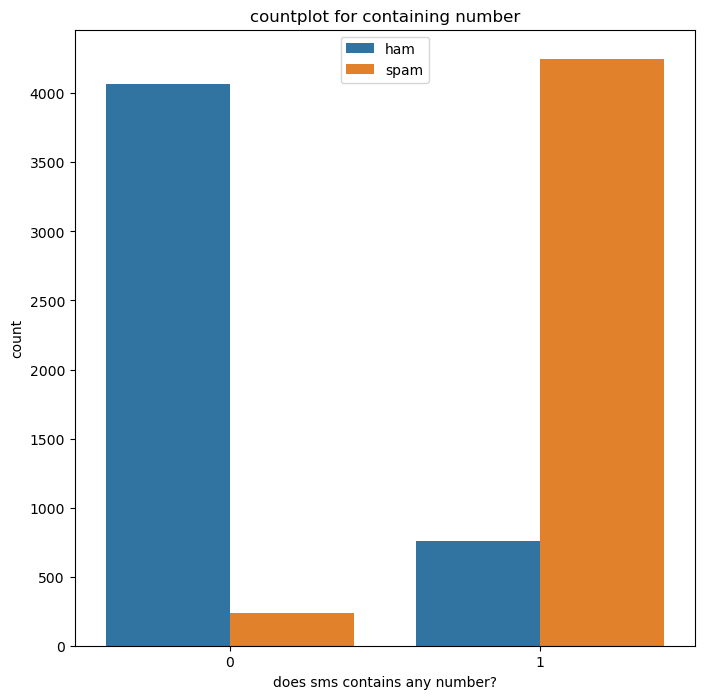

In [29]:
plt.figure(figsize=(8,8))
p = sns.countplot(x = 'contains_number', data = df, hue= 'label')
p = plt.title('countplot for containing number')
p = plt.xlabel('does sms contains any number?')
p = plt.ylabel('count')
p = plt.legend(labels = ['ham','spam'], loc =9)

In [31]:
import nltk
import re
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(df.sms):
    sms = re.sub(pattern = "[^a-zA-Z]",repl=" ",string = sms) #filtering out special characters and numbers
    sms = sms.lower()
    words = sms.split() #tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    sms = " ".join(lemm_words)
    corpus.append(sms)

In [33]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=500)
vectors = tf_idf.fit_transform(corpus).toarray()
feature_names = tf_idf.get_feature_names_out()

In [37]:
x =pd.DataFrame(vectors, columns=feature_names)

In [38]:
y= df['label']

In [39]:
x

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.4117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.326017,0.0,0.0,0.0,0.0,0.0
9306,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.287064,0.0,0.0,0.0,0.0,0.0
9307,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [40]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5539    1
5542    1
5549    1
5568    1
5569    1
Name: label, Length: 9309, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=23)

In [43]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
cv = cross_val_score(model,x,y,scoring ='f1' ,cv =10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [45]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       957
           1       0.94      0.94      0.94       905

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [47]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[902,  55],
       [ 50, 855]], dtype=int64)

In [48]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       957
           1       0.96      1.00      0.98       905

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862

